# Assignment 2

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `Assignment_2_data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [83]:
assert 3 < 5

Execute the next one and you will get an error

In [84]:
assert 3 > 5

AssertionError: 

# Data Import

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [87]:
# your code here
df=pd.read_csv("Assignment_2_data.csv")
print ('the data frame has a shape :', df.shape)

the data frame has a shape : (18207, 88)


In [88]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [89]:
# your code here
print (df.head())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

1.3. Print how many columns that are in df columns types


In [90]:
# your code here
print(df.dtypes)
display(df)

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [91]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']
# your code here
df = df.drop(to_drop, axis = 1)
len(df.columns)

77

In [92]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [93]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing = pd.DataFrame({'column_name': df.columns, 'missing': percent_missing})
missing.sort_values('missing', inplace=True)
display(missing)


,column_name,missing
Age,Age,0.000000
Overall,Overall,0.000000
Potential,Potential,0.000000
Value,Value,0.000000
Wage,Wage,0.000000
...,...,...
RWB,RWB,11.451639
LB,LB,11.451639
CB,CB,11.451639
RB,RB,11.451639


2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [94]:
# your code here
missing = missing[missing['missing'] != 0]
display(missing)

,column_name,missing
LongShots,LongShots,0.263635
Strength,Strength,0.263635
Stamina,Stamina,0.263635
Jumping,Jumping,0.263635
ShotPower,ShotPower,0.263635
...,...,...
RWB,RWB,11.451639
LB,LB,11.451639
CB,CB,11.451639
RB,RB,11.451639


2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [95]:
# your code here
cols_to_fill = missing[missing['missing'] < 1.0].index.tolist()
print(len(cols_to_fill), type(cols_to_fill))

44 <class 'list'>


In [96]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [97]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    if df.dtypes[col_name] == "object":
        df[col_name] = df[col_name].mode()[0];
        
    else:
        df[col_name] = df[col_name].median();
    
        
    
    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [98]:
for col in cols_to_fill:
   fill_nas_by_type(df, col);


In [99]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [100]:
# your code here
print(df.shape)
##is_NaN = df.isnull()
##row_has_NaN = is_NaN.any(axis=1)
##df.drop(row_has_NaN.index);

for col in df.columns:
    df.drop(df[pd.isnull(df[col])].index, inplace = True)

print(df.shape)

(18207, 77)
(14743, 77)


In [101]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [102]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [103]:
def get_value(value_text):
    """Extract the monetary value from a string
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])    

In [104]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [105]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


In [106]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [107]:
# print unique values for Height
df['Height'].unique()

array(["6'0"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [108]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [109]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [110]:
df['Height'] = df['Height'].apply(get_height)

In [111]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [112]:
# print unique values for Weight
df['Weight'].unique()

array(['165lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [113]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [114]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [115]:
df['Weight'] = df['Weight'].apply(get_weight)

In [116]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [117]:
# your code here
text_cols = df.dtypes[df.dtypes=='object'].index
print(len(text_cols))

30


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [118]:
# your code here
cols_to_remove = []
for col in text_cols:
    if len(df[col].value_counts()) > 10:
        cols_to_remove.append(col)
print(len(cols_to_remove))

26


remove `cols_to_remove` columns from `df` and print its shape

In [119]:
# your code here
df = df.drop(cols_to_remove, axis=1)

In [120]:
# check if your answer is correct
assert df.shape == (14743, 51)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [121]:
# your code here
remaining_text_cols = [col for col in text_cols if col in df.columns]
print(len(remaining_text_cols))

4


In [124]:
# check if your answer is correct
assert remaining_text_cols == ['Preferred Foot', 'Work Rate', 'Body Type', 'Position']

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [125]:
# your code here
for col in remaining_text_cols:
    var = df[col].iloc[0]
    for value in df[col]:
        if value == var:
            value = 0
        else:
            value = 1

In [126]:
df.shape

(14743, 51)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `Assignment_2_data_cleaned.csv` into `df_clean` and print its shape.    

In [170]:
df_clean =pd.read_csv("Assignment_2_data_cleaned.csv")
print ('the data frame has a shape :', df_clean.shape)

the data frame has a shape : (14743, 50)


6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

[]

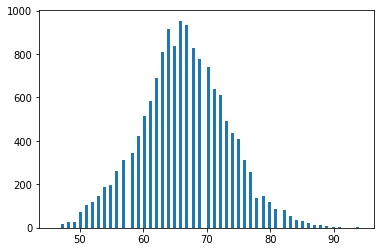

In [171]:
# your code here
y = df_clean['Overall']
X = df_clean
plt.hist(y, bins=100)
plt.plot()

### Comment :
#### Most overall notes are between 60 and 70

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [172]:
# your code here
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10320, 50)
(4423, 50)
(10320,)
(4423,)


8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [173]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [174]:
# your code here

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("MAE : ", mae)

MSE :  2.810084733470462e-18
RMSE :  1.6763307351088156e-09
MAE :  1.0292817488868566e-09


### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

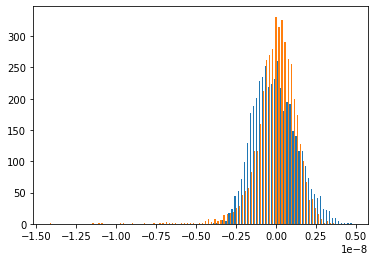

In [183]:
plt.hist(y_test-y_pred, bins = 100)
plt.show()

### Comment : Most of residuals are close to zero, that's a good sign

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

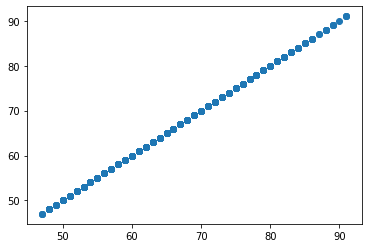

In [176]:
plt.scatter(y_test, y_pred)
plt.show()

10. Try to improve the performance of your model, by adding new features

In [177]:
y = df_clean[['Overall', 'Potential']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 123)

In [178]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("MAE : ", mae)

MSE :  1.7713779386999094e-18
RMSE :  1.3307916310011432e-09
MAE :  1.0090295146013068e-09


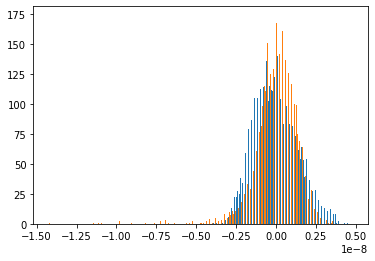

In [179]:
plt.hist(y_test-y_pred, bins = 200)
plt.show()

### Comment : Even if we add the potential column, the data are pretty much the same and residuals also 

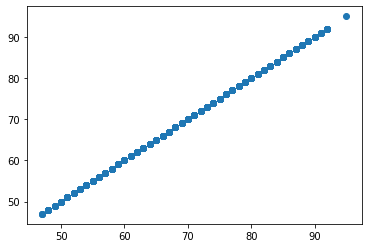

In [180]:
plt.scatter(y_test, y_pred)
plt.show()